In [305]:
%load_ext autoreload
%autoreload 2

%run nb_init.py

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/guillaume/Python/leg-joint



# Energetical aspects of the model


## Total energy of the epithelium

According to the [Farhadifar et
al. paper](http://dx.doi.org/10.1016/j.cub.2007.11.049), in the case
of a regular hexagonal latice, energy is given by:

$$
E = N\frac{K}{2} (A - A_0)^2 + N\frac{\Gamma}{2} L^2 +
6N\frac{\Lambda}{2}\ell
$$

In our model, the area dependant term is replaced by a volume
term :
$$ E = N\frac{K_v}{2} (V - V_0)^2 + N\frac{\Gamma}{2}
L^2 + 3N\Lambda\ell $$

Here the $V = A(\rho - R_L) = Ah $ where $R_L$ is the lumen radius and $\rho$ the radius of the apical sheet of the epithelium.
As they did, we define the adimentional contractility $\bar\Gamma = \Gamma/K_vA_0h_0^2$ and line tension
$\bar\Lambda = \Lambda /K_v (A_0^{3/2}h_0^2)$, where $h_0$ is such that $V_0 = A_0h_0$.


As the epithelium is distributed over a cylinder, the radius of the cylinder determines the number of cells forming a ring around it, $ N_\perp $, so we have: $ \ell = \frac{2\pi}{N_\perp}\rho $ if the cells are aligned along the $z$ axis.
The perimeter $L$ of a cell is equal to $6\ell$ and the area $A$
equals $(3\sqrt{3}/2)\ell^2$. We define the constant $\mu = 6\left(2/3\sqrt{3}\right)^{1/2}$,
then $\ell = \frac{\mu}{6}A^{1/2}$ and $L^2 = \mu^2 A$. 

The normalized energy $\bar E = E/NK_v(A_0h_0)^2$ then reads:
$$
\bar E = \frac{1}{2} \left(\frac{V - V_0}{V_0}\right)^2
+ \frac{\bar\Gamma}{2A_0}\mu^2 A
+ \frac{\bar\Lambda}{A_0^{1/2}} \frac{\mu}{2} A^{1/2} 
$$

We define the dilatation factor $\delta$ such that $\delta = \rho/\rho_0 = h/h_0$, $A/A_0 = \delta^2$ and $V/V_0 = \delta^3$.
The previous equation becomes:

$$
\bar E = \frac{1}{2} \left(\delta^3 - 1\right)^2
+ \frac{\mu^2\bar\Gamma}{2}\delta^2
+ \frac{\mu\bar\Lambda}{2}\delta  
$$

The same calculus in the 2D case gives:
$$
\bar E_{2D} = \frac{1}{2} (\delta^2 - 1)^2
+ \frac{\mu^2\bar\Gamma}{2}\delta^2
+ \frac{\mu\bar\Lambda}{2}\delta  
$$

We can implement those functions rightaway:

In [306]:

mu = 6 * np.sqrt(2. / (3 * np.sqrt(3)))

def elasticity(delta):
    return (delta**3 - 1 )**2 / 2.

def contractility(delta, gamma):
    return gamma * mu**2 * delta**2 / 2.

def tension(delta, lbda):
    return lbda * mu * delta / 2.

def isotropic_energy(delta, gamma, lbda):
    
    energy = (elasticity(delta)
              + contractility(delta, gamma)
              + tension(delta, lbda))
    return energy

def isotropic_energy_2D(delta, gamma, lbda):
    elasticity = (delta**2 - 1)**2 / 2.
    contractility = gamma * mu**2 * delta**2 / 2.
    tension = lbda * mu * delta / 2.
    return elasticity + contractility + tension


/home/guillaume/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib-1.4.x-py3.4-linux-x86_64.egg/matplotlib/figure.py:1644: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


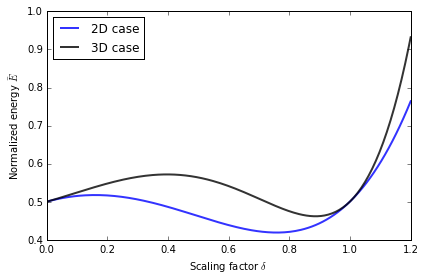

In [307]:
delta = np.linspace(0, 1.2, 200)
#aspects = np.logspace(-6, 0, 40, base=2)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(delta, isotropic_energy_2D(delta, 0.04, 0.12), 'b-', lw=2, alpha=0.8, label='2D case')
ax.plot(delta, isotropic_energy(delta, 0.04, 0.12), 'k-', lw=2, alpha=0.8, label='3D case')

#for aspect in aspects:
#    ax.plot(delta, isotropic_energy(delta, aspect, 0.04, 0.12), 'b-',
#            label=(r'$R_L/R_0 = %.3e$' % aspect), alpha= aspect * 0.6)
ylbl = ax.set_ylabel(r'Normalized energy $\bar E$')
xlblb = ax.set_xlabel('')
xlblb = ax.set_xlabel(r'Scaling factor $\delta$')

ax.legend(loc='upper left')

fig.savefig(lj.data.get_image('isotropic_energy_vs_scaling.svg'))

## Epithelium ground state and phase diagramm

### Gradient expression

The ground state of the regular epithelium is attained when enregy is minimal with respect to $\delta$:

$$
\frac{\partial \bar E}{\partial \delta} = 0
$$

That is (dropping the top bar notation):

$$
3 \delta^2(\delta^3 - 1)
+ \mu^2\Gamma\delta
+ \frac{\mu\Lambda}{2} = 0
$$


In 2D:

$$
2 \delta(\delta^2 - 1)
+ \mu^2\Gamma\delta
+ \frac{\mu\Lambda}{2} = 0
$$


Once again let's code this:

/home/guillaume/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib-1.4.x-py3.4-linux-x86_64.egg/matplotlib/figure.py:1644: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


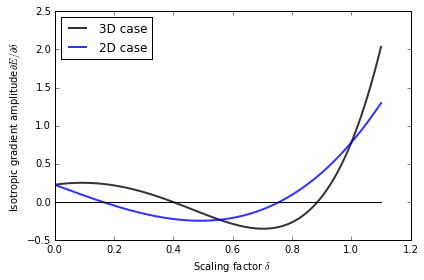

In [308]:
def isotropic_grad_poly(lbda, gamma):
    grad_poly = [3, 0, 0,
                 -3,
                 mu**2 * gamma,
                 mu * lbda / 2.]
    return grad_poly

def isotropic_grad(delta, lbda, gamma):
    grad_poly = isotropic_grad_poly(lbda, gamma)
    return np.polyval(grad_poly, delta)


def isotropic_grad_poly_2D(lbda, gamma):
    grad_poly = [2, 0,
                 mu**2 * gamma - 2,
                 mu * lbda / 2.]
    return grad_poly

def isotropic_grad_2D(delta, lbda, gamma):
    grad_poly = isotropic_grad_poly_2D(lbda, gamma)
    return np.polyval(grad_poly, delta)


## The (archetypal) case I simulations in the article are for
## the following values:
gamma_case1 = 0.04
lbda_case1 = 0.12
# We can plot the above function for a range of values for aspect

deltas = np.linspace(0, 1.1, 200)
    
fig, ax = plt.subplots(1, 1, figsize=(6.,4.))
grad = isotropic_grad(deltas, lbda_case1, gamma_case1)
line = ax.plot(deltas, grad, 'k-', alpha=0.8, lw=2, label='3D case')

grad2D = isotropic_grad_2D(deltas, lbda_case1, gamma_case1)
line = ax.plot(deltas, grad2D, 'b-', alpha=0.8, lw=2, label='2D case')


zero_x = ax.plot(deltas, np.zeros_like(deltas), 'k-') 
ylbl = ax.set_ylabel(r'Isotropic gradient amplitude'
                      '$\partial E / \partial \delta$')
xlblb = ax.set_xlabel(r'Scaling factor $\delta$')
ax.legend(loc='upper left')
plt.draw()
fig.savefig(lj.data.get_image('isotropic_gradient_vs_scaling.svg'))

### Phase diagram

In order for the apical junction to find a stable configuration, the energy must have a minimum as a function of
$\delta$. We can look at several cases and deduce the necessary conditions on $\bar\Gamma$ and $\bar\Lambda$ for this to apply.


#### Soft network

The tissue will behave as a soft network if the energy minimum for equilibrium volumes equal the initial volume ($\delta = 1$), and contractility and elasticity can compensate each over. There exist a minimum energy in this case if:
$$ \mu^2 \Gamma \delta + \mu\Lambda / 2 < 0 $$
The boundary between soft and cristal-like network is given by the line $\Gamma = - 2 \Lambda / 2\mu$ in the $(\Gamma, \Lambda)$ plane.




#### Case $\Lambda \geq 0$, $\Gamma \geq 0$

To fix the correct conditions we have to look in the $(\Gamma, \Lambda)$ plane for real values of the gradient roots.

We can seek the maximum possible values of $\Gamma$ for a given $\Lambda$. We have:
$$
\Gamma = - \frac{\Lambda}{2\mu\delta} + \frac{3}{\mu^2}\delta(1 - \delta^3)
$$

$\Gamma$ is maximal with respect to $\delta$ if
$$
\begin{align*}
\frac{\partial \Gamma}{\partial \delta} = \frac{\Lambda}{2\mu\delta^2} + 3\frac{1 - 4\delta^3}{\mu^2} = 0\\
\Leftrightarrow -12\delta^5 + 3\delta^2 + \Lambda\mu / 2 = 0
\end{align*}
$$

The phase space boundary for valid values of $\Gamma$ and $\Lambda$ is given by the values of $\Gamma$ for the roots of the above polynomial as a function of $\Lambda$.

If $\Lambda = 0$, this gives $\delta_m(\Lambda = 0) = 4^{-1/3}$ and $\Gamma_m(\Lambda = 0) \simeq 0.123$. With a similar reasoning for $\Lambda$, we have $\delta_m(\Gamma = 0) = (2 / 5)^{1/3}$ and $\Lambda_m(\Gamma = 0) \simeq 0.525$

We can solve numerically for the other values of $\Lambda$


In [309]:
### This function does a brute force search for the roots of 
## the gradient in the lambda, gamma plane
def find_grad_roots(lbda, gamma):
    p = isotropic_grad_poly(lbda, gamma)
    roots = np.roots(p)            
    good_roots = np.real([r for r in roots if np.abs(r) == r])
    np.sort(good_roots)
    if len(good_roots) == 1:
        return good_roots
    elif len(good_roots) > 1:
        return good_roots[0]
    else:
        return np.nan

def find_boundary_roots(lbda):
    delta_poly = [-12, 0, 0, 3, 0, lbda * mu / 2]
    roots = np.roots(delta_poly)
    good_roots = np.real([r for r in roots if (np.abs(r) == r) and (0 < r < 1)])
    np.sort(good_roots)
    return good_roots[0]

def get_boundary_gamma(lbda):
    lbda = np.atleast_1d(lbda)
    dm = np.array([find_boundary_roots(l) for l in lbda])
    gamma = -lbda/(2 * mu * dm) + 3 * dm * (1 - dm**3) / mu**2
    return gamma



In [310]:
### Compute the boundary line

lbda_max = 6 * (2 / 5.)**(2/3.) * 0.6 / mu
gamma_max = 3 * 4**(-1 / 3.) * 0.75 / mu**2

b_lbdas = np.linspace(0, lbda_max, 100)
b_gammas = get_boundary_gamma(b_lbdas)
print('''Maximum value for Lambda: %.3f \n'''
      '''Maximum value for Gamma: %.3f''' % (lbda_max, gamma_max))

Maximum value for Lambda: 0.525 
Maximum value for Gamma: 0.102


In [311]:
### Compute the value of delta over a grid in the (Lambda, Gamma) plane

grid_size = 128
lbdas, gammas = np.meshgrid(np.linspace(0, lbda_max * 1.1, grid_size),
                            np.linspace(0, gamma_max * 1.5, grid_size))
roots = []
for l, g in zip(lbdas.ravel(), gammas.ravel()):
    roots.append(find_grad_roots(l, g))
roots = np.array(roots).reshape(gammas.shape)


In [312]:
### 2D case

gammas_2D = np.linspace(0, 2/mu**2, 20)
lambdas_max_2D = ((4 - 2 * gammas_2D * mu**2) / 3.)**(3./2.) / mu


/home/guillaume/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib-1.4.x-py3.4-linux-x86_64.egg/matplotlib/figure.py:1644: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


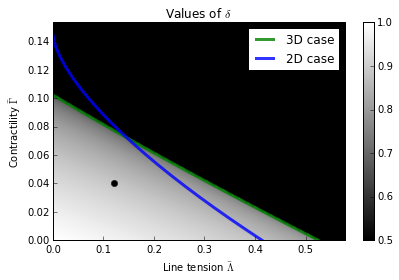

In [313]:
### Plot everything

fig, ax = plt.subplots()
roots[np.isnan(roots)] = 0.5
lbdas, gammas = np.meshgrid(np.linspace(0, lbda_max * 1.1, grid_size), np.linspace(0, gamma_max * 1.5, grid_size))
contour_set = ax.contourf(lbdas, gammas, roots.clip(0.5, 1), 256, cmap='gray')
fig.colorbar(contour_set, ticks=[0.5, 0.6, 0.7, 0.8, 0.9, 1.])

boundary = ax.plot(b_lbdas, b_gammas, 'g-', lw=3, alpha=0.8, label='3D case')
boundary2D = ax.plot(lambdas_max_2D, gammas_2D, 'b-', 
                     lw=3, alpha=0.8, label='2D case')

ax.plot(lbda_case1, gamma_case1, 'ko')

ax.set_xlabel(r'Line tension $\bar\Lambda$')
ax.set_ylabel(r'Contractility $\bar\Gamma$')
ax.set_title('Values of $\delta$')

ax.legend(loc='upper right')
fig.savefig(lj.data.get_image('phase_space_boundaries.svg'))

We can now get the values of the optimal scaling $\delta_o$ and of the ground state energy $E_0$
with a simple root finding on the `isotropic_grad` function:

In [314]:
delta_o = find_grad_roots(lbda_case1, gamma_case1)

print("Optimum scaling factor = %.3f" % delta_o)
ground_energy = isotropic_energy(delta_o, gamma_case1, lbda_case1)
print("Ground energy = %.3f" % ground_energy)


Optimum scaling factor = 0.887
Ground energy = 0.462



### Computation of the scaling factor

Let's note $A_i$ and $\rho_i$ the initial area and radius, 
before relaxation, and $A_f, \rho_f$ the same variables after the isotropic relaxation is applied.
We now want to multiply all the distances by a factor $c$ such that $h_fA_f = \delta_o^3h_0A_0$, with $\rho_f = c\rho_i$ 
and $A_f = c^2A_i$.

By noting $\delta_i = h_i / h_0$, we simply have $c = \delta_o / \delta_i$


We now have the two phase space boundaries given by Faradhifar on figure 1. When we pass to
the simulation we'll use all that to ensure that optimisation will converge and that we start the simultations
close to the ground state.

## Gradient computation at junction vertices

In order to find the local energy minimum, as shown below, we use a conjugate gradient method
(namely the [`fmin_lbfgs`](http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#broyden-fletcher-goldfarb-shanno-algorithm-method-bfgs) algorithm from SciPy). So we need to compute said gradient at each junction vertex that concur to the optimization.

In order to compute the local minimum of the energy, we calculate its
gradient at junction vertex $i$ whose position in the 3D space is defined by the vector $\mathbf{r_i}$ pointing from the coordinate system's origin. An edge between two vertices is noted
$\mathbf{r_{ij}} = \mathbf{r_j} - \mathbf{r_i}$. The coefficients noted $c_{ij}$ correspond to the terms of the graph's adjacency matrix, such that they are equal to 1 if an edge exists between vertices $i$ and $j$, and 0 otherwise.

$$
\begin{aligned} 
   \mathbf{\nabla_i} E &= (\frac{\partial E}{\partial x},
                     \frac{\partial E}{\partial y},
                     \frac{\partial E}{\partial z}) \\
   \mathbf{\nabla_i} E &= \sum_\alpha \left(K (V_\alpha - V_0) 
   \mathbf{\nabla_i} V_\alpha  
   + \Gamma L_\alpha \mathbf{\nabla_i} L_\alpha  \right)c_{i \alpha}  
   + \sum_i \Lambda_{ij} \mathbf{\nabla_i} \ell_{ij}c_{ij}
\end{aligned}
$$

We have 
$$
\begin{aligned} 
   \mathbf{\nabla_i}\ell_{ij} &=  \frac{\mathbf{r}_{ij}}{\ell_{ij}}c_{ij}\\
   \mathbf{\nabla_i}L_\alpha &= \sum_{kn} \mathbf{\nabla_i} 
   \ell_{kn} c_{\alpha k} c_{\alpha n}
   = \sum_{j} \mathbf{\nabla_i}\ell_{ij} c_{ij} c_{\alpha i} c_{\alpha j}
   = \sum_{j} \frac{\mathbf{r_{ij}}}{\ell_{ij}}c_{ij}c_{\alpha i} c_{\alpha j}\\
   \mathbf{\nabla_i}V_{\alpha} &=  \sum_{km}\mathbf{\nabla_i}V_{\alpha km}
   c_{\alpha k}c_{\alpha m}c_{km}
   = \sum_{km} \mathbf{\nabla_i}h_\alpha A_{\alpha km}
   c_{\alpha k}c_{\alpha m}c_{km}
   = A_\alpha \mathbf{\nabla_i}h_\alpha + 
   h_\alpha \sum_{km} \mathbf{\nabla_i} A_{\alpha km}c_{\alpha k}
   c_{\alpha m}c_{km}\\
   \mathbf{\nabla_i}V_{\alpha} &= 
   \frac{h_\alpha}{2} \sum_{km}\mathbf{u}_{\alpha km} 
   \times \frac{\mathbf{r}_{km}}{\nu}c_{\alpha k}c_{\alpha m}c_{km}
   + \sum_{j}\left(A_{\alpha ij}\frac{\mathbf{r_i}}{2\rho_i} 
   + \frac{h_\alpha}{2}\mathbf{r}_{\alpha j} \times \mathbf{u}_{\alpha ij}\right)
     c_{\alpha j}c_{ij}\\
\end{aligned}
$$

With the normal perpendicular to the $(\mathbf{r_k}, \mathbf{r_m})$ plane noted:

$$
\mathbf{u}_{\alpha km} = \frac{\mathbf{r}_{\alpha k} \times \mathbf{r}_{\alpha m}}{||\mathbf{r}_{\alpha k} \times \mathbf{r}_{\alpha m}||}
$$ 




# Implementation in the simulation engine

## Initial state



In [315]:
%pdb

Automatic pdb calling has been turned ON


In [362]:
def draw_xz_cut(eptm):
    pos = gt.group_vector_property([eptm.z, eptm.x])
    front = eptm.is_cell_vert.copy()
    front.a = eptm.y.a > 0
    is_ctoj_edge = eptm.is_junction_edge.copy()
    is_ctoj_edge.a = 1 - eptm.is_junction_edge.a
    eptm.graph.set_vertex_filter(front)
    gt.graph_draw(eptm.graph, pos=pos, vertex_fill_color=eptm.is_cell_vert,
                  edge_color=is_ctoj_edge, vorder=eptm.y, inline=True)
    eptm.graph.set_vertex_filter(None)

2015-04-07 23:22:54,070 -leg_joint.epithelium.epithelium -__init__ -- INFO -Instanciating epithelium tuto
2015-04-07 23:22:54,073 -leg_joint.epithelium.epithelium -__init__ -- INFO -Created new graph
2015-04-07 23:22:54,361 -leg_joint.epithelium.epithelium -__init__ -- INFO -Update geometry
2015-04-07 23:22:54,466 -leg_joint.epithelium.epithelium -__init__ -- INFO -Initial cells
2015-04-07 23:22:54,469 -leg_joint.epithelium.epithelium -__init__ -- INFO -Initial junctions
2015-04-07 23:22:54,856 -leg_joint.epithelium.epithelium -__init__ -- INFO -Isotropic relaxation


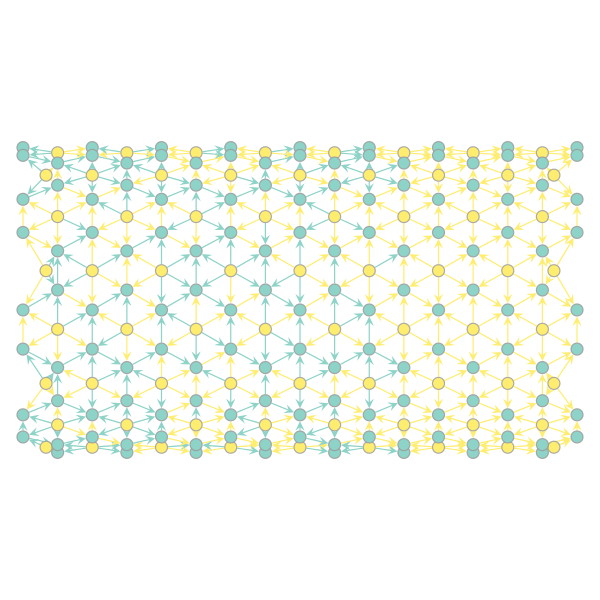

In [363]:
## Epithelium instantiation
eptm = lj.Epithelium(#graphXMLfile=lj.data.initial_graph_xml(),
                     save_dir='saved_graphs',
                     identifier='tuto',
                     copy=True)

## Scaling so that we start at global epithelium
#eptm.isotropic_relax()
draw_xz_cut(eptm)

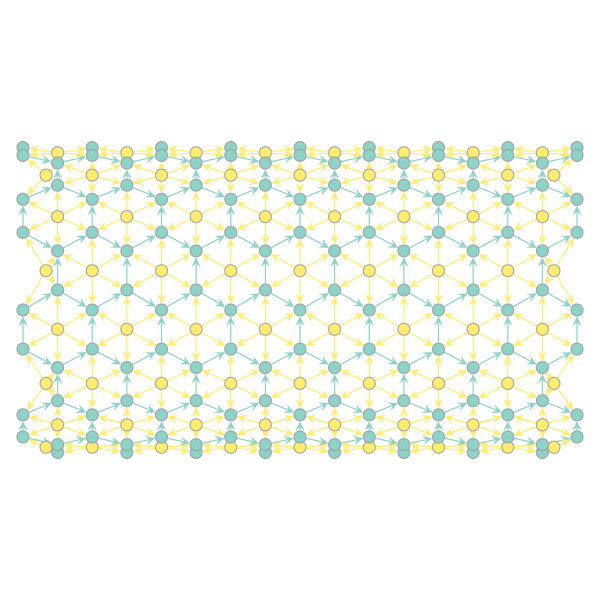

In [364]:
lj.epithelium.generation.reorient_edges(eptm.graph, eptm.is_cell_vert, eptm.is_junction_edge)
draw_xz_cut(eptm)

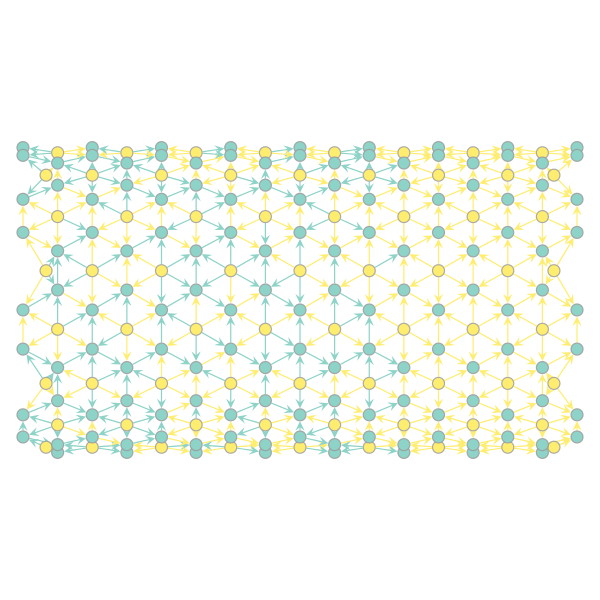

In [371]:
## eptm.isotropic_relax() ## mixes the edges
eptm.update_pmaps() ##  mixes the edges
#lj.epithelium.generation.reorient_edges(eptm.graph, eptm.is_cell_vert, eptm.is_junction_edge)
draw_xz_cut(eptm)

### We can gather information like the average cell surface

To do so, we use graph-tool's filtering mechanism. We use two attributes of the `Epithelium` object:
`is_cell_vert` and `is_alive`, which are graph-tools boolean `PropertyMaps`.

In [353]:
## Create a filter with only the 'live' cell vertices
vfilt = eptm.is_cell_vert.copy() 
vfilt.a *= eptm.is_alive.a
## Filtering
eptm.graph.set_vertex_filter(vfilt)

area = eptm.area.fa.mean()
height = eptm.height.fa.mean()
eptm.delta_o = eptm.find_grad_roots()
print('Square root of the ratio between the prefered area\n'
      'and the actual average area: %.6f\n' 
      % (np.sqrt(area / eptm.params["prefered_area"])))
print('Ratio between the prefered height\n'
      'and the actual average height: %.6f\n' 
      % (height / eptm.params['prefered_height']))
print('Scaling factor with respect to elastic volume equilibrium: %.6f\n'
      % eptm.delta_o)

# Remove the filter
eptm.graph.set_vertex_filter(None)


Square root of the ratio between the prefered area
and the actual average area: 0.870634

Ratio between the prefered height
and the actual average height: 0.886593

Scaling factor with respect to elastic volume equilibrium: 0.886593



All three numbers should be equal by definition

## Energy profile as a function of scaling

The graph bellow corresponds to the analytical computations above

/home/guillaume/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib-1.4.x-py3.4-linux-x86_64.egg/matplotlib/figure.py:1644: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


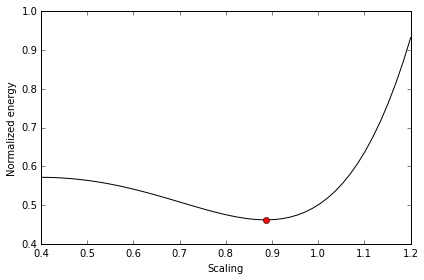

In [319]:
fig, ax = plt.subplots(figsize=(6, 4))
lbda = eptm.paramtree.relative_dic['line_tension']
gamma = eptm.paramtree.relative_dic['contractility']
deltas = np.linspace(0.4, 1.2)
ax.plot(deltas, eptm.isotropic_energy(deltas), 'k-',
        label='Analytical total')
ax.plot(eptm.delta_o, eptm.isotropic_energy(eptm.delta_o), 'ro')
ax.set_ylabel('Normalized energy')
ax.set_xlabel('Scaling');


## Comparison between anaytical and computed solutions


In [320]:
eptm.calc_energy(full_output=False) / eptm.norm_factor

56.199266753480046

0.886592687387 0.737271813722


/home/guillaume/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib-1.4.x-py3.4-linux-x86_64.egg/matplotlib/figure.py:1644: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


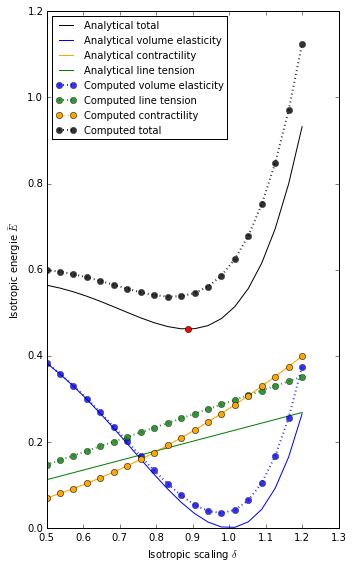

In [330]:
deltas = np.linspace(0.5, 1.2, 20)
fig, ax = plt.subplots(figsize=(5, 8))
lbda = eptm.paramtree.relative_dic['line_tension']
gamma = eptm.paramtree.relative_dic['contractility']
ax.plot(deltas, eptm.isotropic_energy(deltas), 'k-',
        label='Analytical total')
ax.plot(eptm.delta_o, eptm.isotropic_energy(eptm.delta_o), 'ro')
ax.plot(deltas, elasticity(deltas), 'b-',
        label='Analytical volume elasticity')
ax.plot(deltas, contractility(deltas, gamma), c='orange', ls='-',
        label='Analytical contractility')
ax.plot(deltas, tension(deltas, lbda), 'g-',
        label='Analytical line tension')

ax.set_xlabel(r'Isotropic scaling $\delta$')
ax.set_ylabel(r'Isotropic energie $\bar E$')

#eptm.update_rhotheta()
area0 = eptm.params['prefered_area']
h_0 = eptm.params['prefered_height']

## Create a filter with only the 'live' cell vertices
vfilt = eptm.is_cell_vert.copy() 
vfilt.a *= eptm.is_alive.a

### Cells only area and height
eptm.graph.set_vertex_filter(vfilt)
area_avg = eptm.area.fa.mean()
rho_avg = eptm.rho.fa.mean()
eptm.graph.set_vertex_filter(None)

### Set height and area to height0 and area0
scale = (area0 / area_avg)**0.5
eptm.scale(scale)
eptm.rho_lumen = rho_avg * scale - h_0
eptm.update_geometry()
lj.epithelium.generation.reorient_edges(eptm.graph, eptm.is_cell_vert, eptm.is_junction_edge)


energy = eptm.calc_energy()

norm = (eptm.params['prefered_area']**2
        * eptm.params['prefered_height']**2
        * eptm.params['vol_elasticity']
        * (eptm.is_cell_vert.a * eptm.is_alive.a).sum())

cell = eptm.graph.vertex(60)

energies = np.zeros((deltas.size, 3))
#scales = np.linspace(0.5, 1.2, 20) / eptm.delta_o
for n, delta in enumerate(deltas):
    eptm.scale(delta)
    El, Ec, Ev = eptm.calc_energy(full_output=True)
    energies[n, :] = [Ev.sum(), El.sum(), Ec.sum()]
    eptm.scale(1 / delta)
    
eptm.isotropic_relax()


energies = np.array(energies) / norm
ax.plot(deltas, energies[:, 0], 'bo:', lw=2, alpha=0.8,
        label='Computed volume elasticity')
ax.plot(deltas, energies[:, 1], 'go:', lw=2, alpha=0.8,
        label='Computed line tension')
ax.plot(deltas, energies[:, 2], ls=':',
        marker='o', c='orange', label='Computed contractility')
ax.plot(deltas, energies.sum(axis=1), 'ko:', lw=2, alpha=0.8,
        label='Computed total')

ax.legend(loc='upper left', fontsize=10)
ax.set_ylim(0, 1.2)

plt.savefig(lj.data.get_image('scaling_comparison.svg'))


print(eptm.delta_o, deltas[energies.sum(axis=1).argmin()] * eptm.delta_o)


Note that at initialisation time, we also
invoked the `isotropic_relax` method,
and we start with an hexagonal lattice, so we should be fairly close to
the ground state energy, except from the cells closer to edges along the $z$ axis.

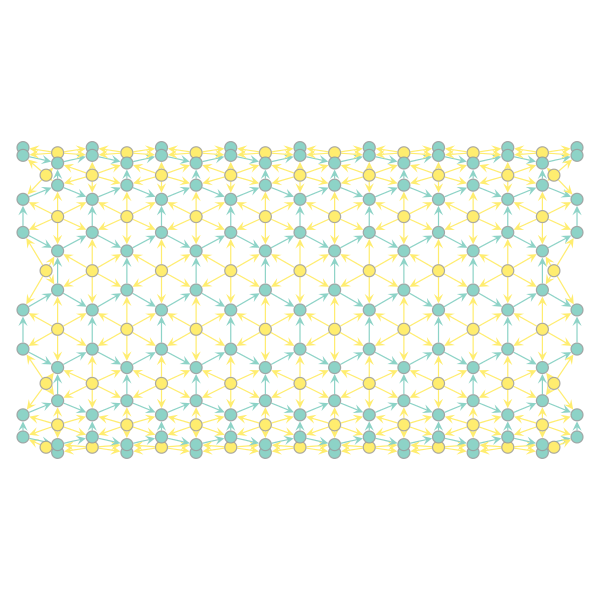

In [349]:
lj.epithelium.generation.reorient_edges(eptm.graph, eptm.is_cell_vert, eptm.is_junction_edge)
eptm.scale(2)

pos = gt.group_vector_property([eptm.z, eptm.x])
front = eptm.is_cell_vert.copy()
front.a = eptm.y.a > 0
is_ctoj_edge = eptm.is_junction_edge.copy()
is_ctoj_edge.a = 1 - eptm.is_junction_edge.a

eptm.graph.set_vertex_filter(front)
gt.graph_draw(eptm.graph, pos=pos, vertex_fill_color=eptm.is_cell_vert,
              edge_color=is_ctoj_edge, vorder=eptm.y, inline=True)
eptm.graph.set_vertex_filter(None)
#eptm.isotropic_relax()


In [323]:
for src, idx in eptm.edge_df.index:
    print(src, idx)

0 1
0 23
0 25
0 24
1 2
1 25
2 27
3 4
3 27
3 28
3 2
4 5
4 28
5 30
6 7
6 31
6 30
6 5
7 8
7 31
8 33
9 10
9 33
9 34
9 8
10 11
10 34
11 36
12 13
12 37
12 36
12 11
13 14
13 37
14 39
15 16
15 40
15 39
15 14
16 17
16 40
17 42
18 19
18 43
18 42
18 17
19 20
19 43
20 45
21 22
21 46
21 45
21 20
22 23
22 46
23 24
24 25
24 71
25 49
26 50
26 27
26 49
26 1
26 2
26 25
27 50
27 28
28 52
29 53
29 52
29 30
29 4
29 5
29 28
30 53
30 31
31 55
32 55
32 56
32 33
32 7
32 8
32 31
33 56
33 34
34 58
35 59
35 58
35 36
35 10
35 11
35 34
36 59
36 37
37 61
38 61
38 62
38 39
38 13
38 14
38 37
39 40
39 62
40 64
41 42
41 65
41 64
41 16
41 17
41 40
42 43
42 65
43 67
44 68
44 45
44 67
44 19
44 20
44 43
45 46
45 68
46 70
47 71
47 70
47 22
47 23
47 24
47 46
48 49
48 71
48 73
48 72
48 24
48 25
49 50
49 73
50 75
51 52
51 75
51 76
51 27
51 28
51 50
52 53
52 76
53 78
54 55
54 79
54 78
54 30
54 31
54 53
55 56
55 79
56 81
57 58
57 81
57 82
57 33
57 34
57 56
58 59
58 82
59 84
60 61
60 85
60 84
60 36
60 37
60 59
61 62
61 85
62 87
63

In [324]:
for e in eptm.graph.edges():
    print(e)

(0, 1)
(0, 23)
(0, 25)
(0, 24)
(1, 2)
(1, 25)
(2, 27)
(3, 4)
(3, 27)
(3, 28)
(3, 2)
(4, 5)
(4, 28)
(5, 30)
(6, 7)
(6, 31)
(6, 30)
(6, 5)
(7, 8)
(7, 31)
(8, 33)
(9, 10)
(9, 33)
(9, 34)
(9, 8)
(10, 11)
(10, 34)
(11, 36)
(12, 13)
(12, 37)
(12, 36)
(12, 11)
(13, 14)
(13, 37)
(14, 39)
(15, 16)
(15, 40)
(15, 39)
(15, 14)
(16, 17)
(16, 40)
(17, 42)
(18, 19)
(18, 43)
(18, 42)
(18, 17)
(19, 20)
(19, 43)
(20, 45)
(21, 22)
(21, 46)
(21, 45)
(21, 20)
(22, 23)
(22, 46)
(23, 24)
(24, 25)
(24, 71)
(25, 49)
(26, 50)
(26, 27)
(26, 49)
(26, 1)
(26, 2)
(26, 25)
(27, 50)
(27, 28)
(28, 52)
(29, 53)
(29, 52)
(29, 30)
(29, 4)
(29, 5)
(29, 28)
(30, 53)
(30, 31)
(31, 55)
(32, 55)
(32, 56)
(32, 33)
(32, 7)
(32, 8)
(32, 31)
(33, 56)
(33, 34)
(34, 58)
(35, 59)
(35, 58)
(35, 36)
(35, 10)
(35, 11)
(35, 34)
(36, 59)
(36, 37)
(37, 61)
(38, 61)
(38, 62)
(38, 39)
(38, 13)
(38, 14)
(38, 37)
(39, 40)
(39, 62)
(40, 64)
(41, 42)
(41, 65)
(41, 64)
(41, 16)
(41, 17)
(41, 40)
(42, 43)
(42, 65)
(43, 67)
(44, 68)
(44, 45)
(44, 

In [325]:
e

<Edge object with source '406' and target '407' at 0x7ff4a4b01af8>

In [327]:
eptm.edge_df.shape, eptm.graph.num_edges()

((1176, 11), 1176)

In [328]:
for edge, val in zip(eptm.graph.edges(), eptm.edge_df.is_junction_edge.values):
    assert eptm.is_junction_edge[edge] == val